<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD%20/trabajos/f1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudio de datos historicos de la Formula 1

## Trabajo realizado por David Bernabeu Ferrer y Santiago Galiano Segura


In [ ]:
# Importamos las librerias a utilizar en todo el cuaderno
## Módulo de recolección de basura
import gc

## Librería de tiempo
import time

## Librerias de datos
import pandas as pd
import numpy as np

## Librerías de Visualización de datos
import matplotlib.pyplot as plt

## Librería de datos (paralela)
import dask.dataframe as dd

## Deshabilitamos la opción de máximas columnas para poder desplazarnos horizontalmente en los DFs
pd.set_option("display.max_columns", None)

Para este trabajo, ha sido utilizado el siguiente [conjunto de datos](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020) que corresponde con un datasets de la Formula 1.

Dicho datasets posee considerables datos acerca de pilotos, equipos, carreras y circuitos. Dichos datos son de gran relevancia a la hora de analizar a posteriori, que equipos y pilotos han rendido mejor por cada carrera o por cada año.

In [ ]:
# Leemos los DataFrames respectivos al
# problema a analizar, es decir, los datasets de la Formula 1

circuits              = pd.read_csv("./datasets/circuits.csv")
constructor_results   = pd.read_csv("./datasets/constructor_results.csv")
constructor_standings = pd.read_csv("./datasets/constructor_standings.csv")
constructors          = pd.read_csv("./datasets/constructors.csv")
driver_standings      = pd.read_csv("./datasets/driver_standings.csv")
lap_times             = pd.read_csv("./datasets/lap_times.csv")
races                 = pd.read_csv("./datasets/races.csv")
seasons               = pd.read_csv("./datasets/seasons.csv")
drivers               = pd.read_csv("./datasets/drivers.csv")
status                = pd.read_csv("./datasets/status.csv")
results               = pd.read_csv("./datasets/results.csv")

## Análisis de tiempo de lectura de archivos en Python
En este apartado vamos a comparar el tiempo de lectura de archivos en función del engine que se utilice para leer dichos archivos. A su vez, también se comparará con el formato de archivo, es decir, se comprobará la velocidad de lectura para archivos con extensión CSV y con extensión parquet. Por último, también realizaremos pruebas con dast.

### Lectura de archivos con extensión CSV

Primero de todo, vamos a probar a leer un CSV pequeño, es decir, con 26080 filas por 18 columnas, lo que consideramos un tamaño pequeño. En dicha prueba, utilizaremos el archivo de results.csv que nos proporciona el dataset de la Formula 1.

En este apartado, se probará a leer dicho archivo CSV con los engines
* C
* Python
* Pyarrow
* Python-fwf

#### Lectura de CSV pequeño

Tiempo con el motor c: 0.08 segundos para un dataframe de (26080, 18)
Tiempo con el motor python: 0.26 segundos para un dataframe de (26080, 18)
Tiempo con el motor pyarrow: 0.02 segundos para un dataframe de (26080, 18)
Tiempo con el motor python-fwf: 0.11 segundos para un dataframe de (26080, 10)


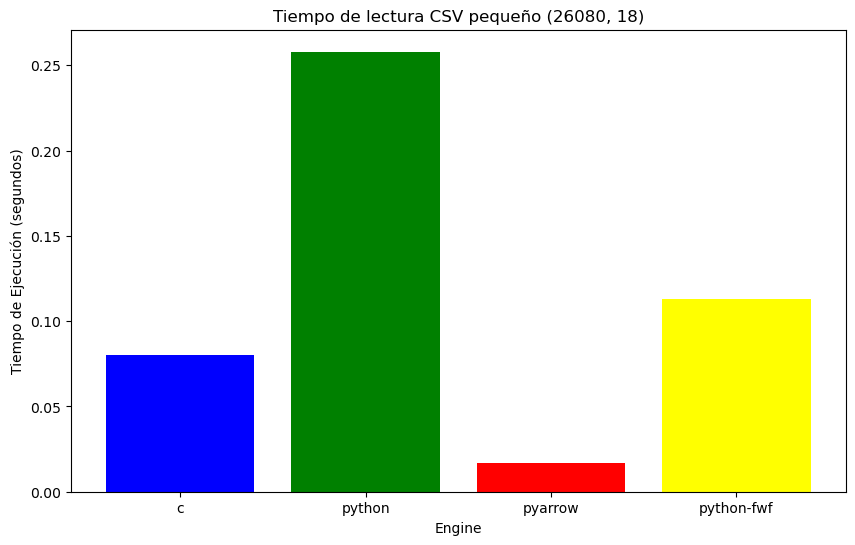

In [ ]:
archivo_csv_peque  = "./datasets/results.csv"

lista_engines = ['c', 'python', 'pyarrow', 'python-fwf']
lista_tiempos = []
for eng in lista_engines:
    # Medimos el tiempo de lectura con el motor
    inicio = time.time()
    df = pd.read_csv(archivo_csv_peque, engine=eng)
    fin = time.time()
    tiempo_csv_peque = fin - inicio
    lista_tiempos += [tiempo_csv_peque]
    print(f"Tiempo con el motor {eng}: {tiempo_csv_peque:.2f} segundos para un dataframe de {str(df.shape)}")
    time.sleep(1)
    # Elimina el DataFrame y limpia la memoria
    del df
    gc.collect()

# Crear una gráfica de barras para comparar los tiempos de ejecución
plt.figure(figsize=(10,6))
plt.bar(lista_engines, lista_tiempos, color=['blue', 'green', 'red', 'yellow'])  # Selecciona colores diferentes para cada barra si lo deseas
plt.title('Tiempo de lectura CSV pequeño (26080, 18)')
plt.xlabel('Engine')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.show()

Como podemos observar, hay una clara ventaja temporal al utilizar como engine de lectura de archivos 'pyarrow', beneficiandonos considerablemente y ahorrandonos tiempo en el proceso de lectura de los archivos. A pesar de que los tiempos sean infimos, estos tiempos crecerán proporcionalmente al tamaño del archivo a leer, como podemos observar a continuación, que vamos a aumentar el tamaño y dimension del archivo a leer.

#### Lectura de CSV mediano

Tiempo con el motor c: 0.30 segundos para un dataframe de (551742, 6)
Tiempo con el motor python: 3.02 segundos para un dataframe de (551742, 6)
Tiempo con el motor pyarrow: 0.09 segundos para un dataframe de (551742, 6)
Tiempo con el motor python-fwf: 1.69 segundos para un dataframe de (551742, 2)


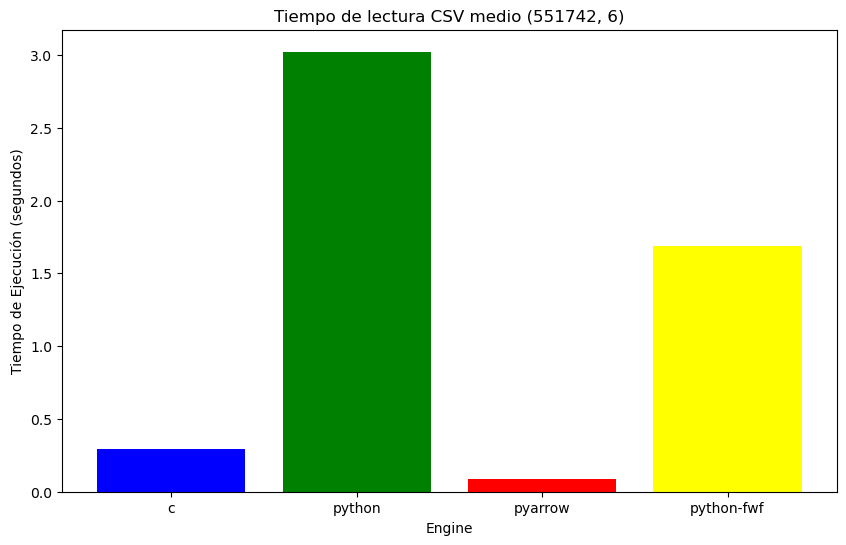

In [ ]:
archivo_csv_grande = "./datasets/lap_times.csv"

lista_engines = ['c', 'python', 'pyarrow', 'python-fwf']
lista_tiempos = []

for eng in lista_engines:
    # Medimos el tiempo de lectura con el motor
    inicio = time.time()
    df = pd.read_csv(archivo_csv_grande, engine=eng)
    fin = time.time()
    tiempo_csv_grande = fin - inicio
    lista_tiempos += [tiempo_csv_grande]
    print(f"Tiempo con el motor {eng}: {tiempo_csv_grande:.2f} segundos para un dataframe de {str(df.shape)}")
    time.sleep(1)
    # Elimina el DataFrame y limpia la memoria
    del df
    gc.collect()

# Crear una gráfica de barras para comparar los tiempos de ejecución
plt.figure(figsize=(10,6))
plt.bar(lista_engines, lista_tiempos, color=['blue', 'green', 'red', 'yellow'])  # Selecciona colores diferentes para cada barra si lo deseas
plt.title('Tiempo de lectura CSV medio (551742, 6)')
plt.xlabel('Engine')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.show()


Como podemos observar, aunque el tamaño del archivo crezca, pyarrow sigue destacando entre los demás engines debido a su velocidad de lectura. Cabe destacar que el engine 'C' tambien es considerablemente rápido, pero preferiblemente elegiremos siempre pyarrow para aprovechar su velocidad de lectura y procesamiento de archivos para vernos perjudicados temporalmente lo mínimo posible.

Por otro lado, ahora vamos a crear de forma artificial un archivo CSV y parquet considerablemente grandes, es decir de 2.500.000 filas y 12 columnas.

#### Lectura de CSV grande

In [ ]:
archivo_csv_muy_grande = "./datasets/very_big_dataset.csv"
data = {
    "A": range(1, 2500001),
    "B": range(2500001, 5000001),
    "C": range(5000001, 7500001),
    "D": range(7500001, 10000001),
    "E": range(10000001, 12500001),
    "F": range(12500001, 15000001),
    "G": range(15000001, 17500001),
    "H": range(17500001, 20000001),
    "I": range(20000001, 22500001),
    "J": range(22500001, 25000001),
    "K": range(25000001, 27500001),
    "L": range(27500001, 30000001),
    "M": range(30000001, 32500001),
}
df = pd.DataFrame(data=data)
df.to_csv(archivo_csv_muy_grande)
df.to_parquet("./datasets/very_big_dataset.parquet")

Una vez creados los archivos, primero procederemos a realizar el analisis temporal respecto al archivo CSV, como hemos realizado hasta el momento.

Tiempo con el motor c: 2.74 segundos para un dataframe de (2500000, 14)
Tiempo con el motor python: 29.72 segundos para un dataframe de (2500000, 14)
Tiempo con el motor pyarrow: 0.30 segundos para un dataframe de (2500000, 14)
Tiempo con el motor python-fwf: 7.13 segundos para un dataframe de (2500000, 1)


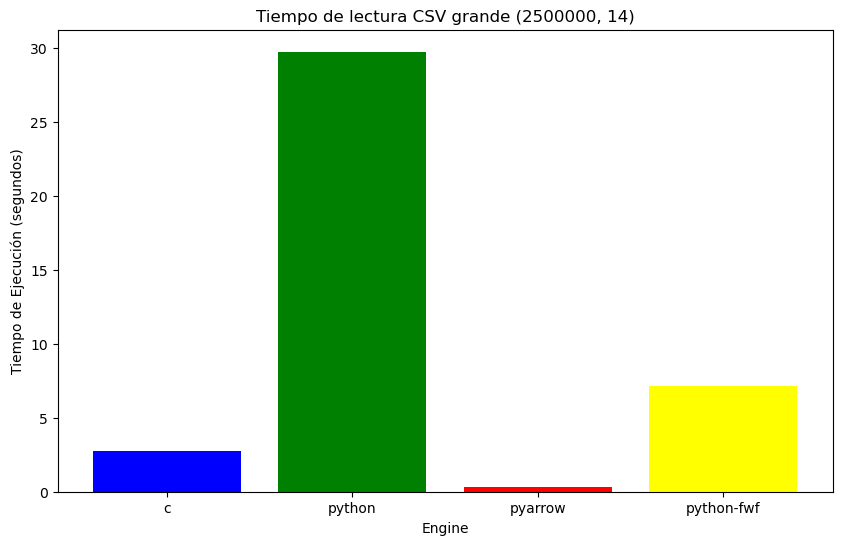

In [ ]:
archivo_csv_muy_grande = "./datasets/very_big_dataset.csv"

lista_engines = ['c', 'python', 'pyarrow', 'python-fwf']
lista_tiempos_csv = []
for eng in lista_engines:
    # Medimos el tiempo de lectura con el motor
    inicio = time.time()
    df = pd.read_csv(archivo_csv_muy_grande, engine=eng)
    fin = time.time()
    tiempo_csv_grande = fin - inicio
    lista_tiempos_csv += [tiempo_csv_grande]
    print(f"Tiempo con el motor {eng}: {tiempo_csv_grande:.2f} segundos para un dataframe de {str(df.shape)}")
    # Elimina el DataFrame y limpia la memoria
    del df
    gc.collect()

# Crear una gráfica de barras para comparar los tiempos de ejecución
plt.figure(figsize=(10,6))
plt.bar(lista_engines, lista_tiempos_csv, color=['blue', 'green', 'red', 'yellow'])  # Selecciona colores diferentes para cada barra si lo deseas
plt.title('Tiempo de lectura CSV grande (2500000, 14)')
plt.xlabel('Engine')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.show()

Como podemos observar y siguiendo la línea de los análisis realizados previamente, pyarrow posee un claro dominio sobre los demás engines a la hora de la lectura de archivos CSV en Python. Por lo que, concluimos que es deseable y óptimo utilizar pyarrow como engine a la hora de leer archivos de este tipo.

#### Lectura de paquetes grandes

Ahora vamos a realizar el análisis de archivos con extensión .parquet. Para ello, primero de todo, instalaremos fastparquet que, generalmente, no viene instalado por defecto con Python. Tambien se indica la instrucción de como instalar pyarrow.

In [ ]:
!python3 -m pip install pyarrow
!python3 -m pip install fastparquet

Ahora, vamos a repetir la prueba, pero esta vez, con archivo con extensión .parquet, para observar si, a pesar de ser exactamente el mismo conjunto de datos, podemos observar diferencias entre las distintas formas de almacenamiento de los datos.

Tiempo con el motor fastparquet: 0.49 segundos para un dataframe de (2500000, 13)
Tiempo con el motor pyarrow: 0.31 segundos para un dataframe de (2500000, 13)


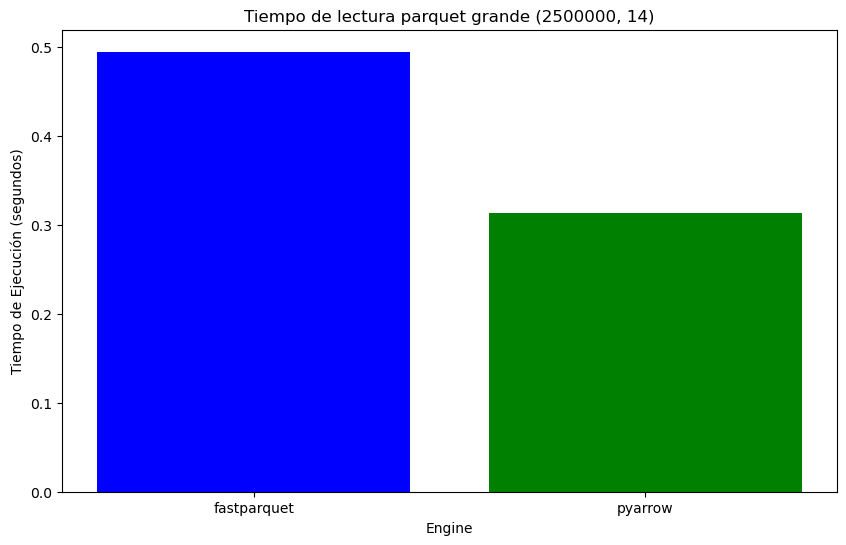

In [ ]:
archivo_parquet_muy_grande = "./datasets/very_big_dataset.parquet"

lista_engines = ['fastparquet', 'pyarrow']
lista_tiempos_parquet = []

for eng in lista_engines:
    # Medimos el tiempo de lectura con el motor
    inicio = time.time()
    df = pd.read_parquet(archivo_parquet_muy_grande, engine=eng)
    fin = time.time()
    tiempo_parquet_grande = fin - inicio
    lista_tiempos_parquet += [tiempo_parquet_grande]
    print(f"Tiempo con el motor {eng}: {tiempo_parquet_grande:.2f} segundos para un dataframe de {str(df.shape)}")
    time.sleep(1)
    # Elimina el DataFrame y limpia la memoria
    del df
    gc.collect()

# Crear una gráfica de barras para comparar los tiempos de ejecución
plt.figure(figsize=(10,6))
plt.bar(lista_engines, lista_tiempos_parquet, color=['blue', 'green'])  # Selecciona colores diferentes para cada barra si lo deseas
plt.title('Tiempo de lectura parquet grande (2500000, 14)')
plt.xlabel('Engine')
plt.ylabel('Tiempo de Ejecución (segundos)')
plt.show()


Como podemos observar, ambos engines son bastante parejos con respecto a los tiempos, a pesar de que pyarrow sea el vencedor, sin embargo, elegir fastparquet no nos penalizaría tanto como cambiar de engine en los formatos CSV.

Cabe destacar que, a pesar de si comparamos el tiempo de pyarrow en formato csv (0.30s) con el formato parquet (0.31s), son prácticamente idénticos, por lo que, realmente, con estas premisas, sería equivalente utilizar formatos CSV o parquet.

Sin embargo, cabe destacar que a pesar de ser el mismo conjunto de datos, el formato CSV ocupa en espacio de disco 300.3MB, mientras que el archivo con extensión parquet ocupa 133.7MB. De esta forma, destacamos que los archivos parquet por defecto utilizan un algoritmo de compresión denominado [snappy](https://google.github.io/snappy/), lo que nos permite ahorrar espacio en disco y por tanto, generalmente, es más óptimo. Por este motivo, siempre que podamos, intentaremos trabajar con archivos con extensión .parquet combinado con el engine pyarrow, dandonos esta combinación una gran ventaja de almacenamiento y de tiempo.

### Lectura de Dask grande
Ahora vamos a probar dask, el cual es una librería paralela y distribuida para el análisis de datos. Vamos primero a instalar dicha librería

In [ ]:
!python3 -m pip install dask

Tiempo con Parquet(Dask): 1.50 segundos para un dataframe de (2500000, 13)
Tiempo con CSV(Dask): 1.48 segundos para un dataframe de (2500000, 14)


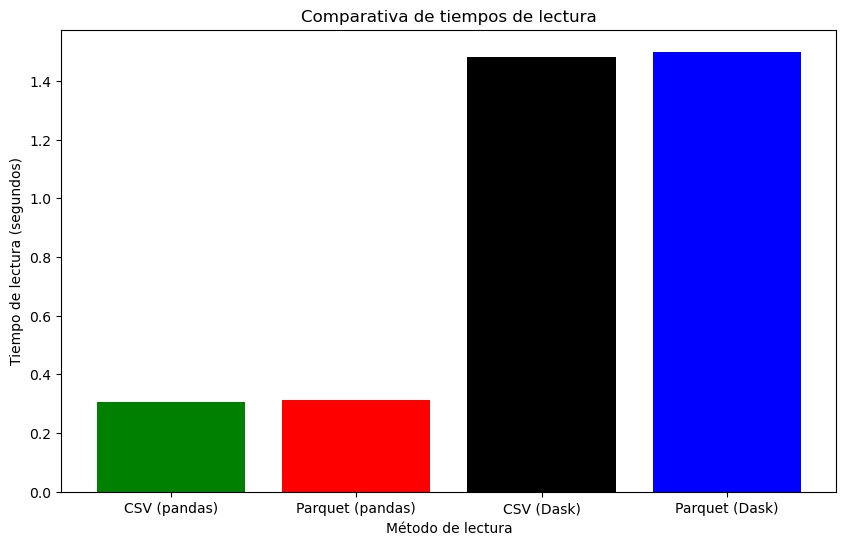

In [ ]:
# Medimos el tiempo de lectura con Dask
inicio = time.time()
ddf = dd.read_parquet(archivo_parquet_muy_grande)
# Para obtener el tiempo de lectura, es necesario calcular (o "computar") el Dask DataFrame
# porque Dask es "lazy" y no lee/computa los datos hasta que se necesita realizar una operación
# real sobre ellos.
df = ddf.compute()
fin = time.time()

tiempo_parquet_dask = fin - inicio
print(f"Tiempo con Parquet(Dask): {tiempo_parquet_dask:.2f} segundos para un dataframe de {str(df.shape)}")


# Medimos el tiempo de lectura con Dask
inicio = time.time()
ddf = dd.read_csv(archivo_csv_muy_grande)
# Para obtener el tiempo de lectura, es necesario calcular (o "computar") el Dask DataFrame
# porque Dask es "lazy" y no lee/computa los datos hasta que se necesita realizar una operación
# real sobre ellos.
df = ddf.compute()
fin = time.time()

tiempo_csv_dask = fin - inicio
print(f"Tiempo con CSV(Dask): {tiempo_csv_dask:.2f} segundos para un dataframe de {str(df.shape)}")


# Crear una gráfica de barras para mostrar el tiempo de ejecución con Dask
plt.figure(figsize=(10,6))
plt.bar(['CSV (pandas)','Parquet (pandas)','CSV (Dask)' ,'Parquet (Dask)'], [lista_tiempos_csv[2], lista_tiempos_parquet[1], tiempo_csv_dask,tiempo_parquet_dask], color=['green', 'red','black', 'blue'])
plt.title('Comparativa de tiempos de lectura')
plt.xlabel('Método de lectura')
plt.ylabel('Tiempo de lectura (segundos)')
plt.show()

# Explicación de los datos empleados

En este apartado se explicará lo que representa cada conjunto datos representados en los ficheros CSV.

## Seasons
El conjunto de datos **seasons** procedente del dataset [seasons.csv](/datasets/seasons.csv), contiene información sobre los años en los que ha habido temporadas de fórmula 1. Las columnas que componen el CSV son:

- **year**: año en el que se llevo a cabo una temporada.
- **url**: link a la página de wikipedia con información de la temporada.

In [ ]:
seasons

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...
...,...,...
69,2019,http://en.wikipedia.org/wiki/2019_Formula_One_...
70,2020,http://en.wikipedia.org/wiki/2020_Formula_One_...
71,2021,http://en.wikipedia.org/wiki/2021_Formula_One_...
72,2022,http://en.wikipedia.org/wiki/2022_Formula_One_...


## Races
El conjunto de datos **races** procedente del dataset [races.csv](/datasets/races.csv), contiene información asociada a los grandes premios celebrados. Las columnas que componen este conjunto de datos son:

- **raceId**: identificador de la carrera.
- **year**: año en el que se celebró el gran premio.
- **round**: ronda en la que se celebraba el gran premio en la temporada.
- **circuitId**: identificador del circuito donde se celebra el gran premio.
- **name**: nombre del gran premio.
- **date**: fecha en la que se celebraba la carrera.
- **time**: hora en la que se celebraba el gran premio.
- **url**: link a una página de wikipedia con información sobre el gran premio.
- **'sesion'_date** : la fecha de las sesiones celebradas en el gran premio.
- **'sesion'_time** : la hora a la que se celebra cada una de las sesiones.

In [ ]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


## Circuits
El conjunto de datos **circuits** procedente del dataset [circuits.csv](/datasets/circuits.csv), contiene información asociada a los circuitos que han formado parte en la historia de la fórmula 1. La información que contiene es:

- **circuitId**: id asociado al circuito.
- **circuitRef**: referencia al circuito.
- **name**: nombre del circuito.
- **location**: ciudad donde se encuentra el circuito.
- **country**: país donde se encuentra el circuito.
- **lat,lng,alt** : coordenadas donde se encuentra el circuito.
- **url**: link asociado a una página de wikipedia que contiene información sobre el circuito.

In [ ]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


## Lap Times
El conjunto de datos **lap_times** procedente del dataset [lap_times.csv](/datasets/lap_times.csv), contiene información sobre los tiempos por vuelta de cada uno de los pilotos en una carrera, esa información viene estructurada de la siguiente manera.

- **raceId**: identificador de la carrera a la que corresponde dicha vuelta.
- **driverId**: identificador del piloto que realiza la vuelta.
- **lap**: número de vuelta en el que se efectua dicho tiempo.
- **position**: posición en la que se encuentra el piloto que efectua la vuelta.
- **time**: el tiempo por vuelta efectuado representado en `minutos:segundos:milisegundos`.
- **miliseconds** : el tiempo por vuelta representado en `milisegundos`.


In [ ]:
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


## Drivers
El conjunto de datos **drivers** procedente del dataset [drivers.csv](/datasets/drivers.csv), contiene información sobre los pilotos que han participado al menos un gran premio de fórmula 1. Los pilotos vienen representados con la siguiente estructura:

- **driverId**: identificador del piloto .
- **driverRef**: referencia del piloto.
- **number**: número/dorsal que lleva el piloto en el coche.
- **code** : código utilizado por la retrasmisión para identificar al piloto.
- **forename**: nombre del plioto.
- **surename** : primer apellido del piloto.
- **dob**: fecha de nacimiento del piloto.
- **nationality**: nacionalidad del piloto.
- **url**: link a la página de wikipedia que contiene información sobre el piloto.

In [ ]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


## Drivers standings
El conjunto de datos **drivers standings** procedente del dataset [drivers_standings.csv](/datasets/driver_standings.csv), contiene información sobre la clasificación en el campeonato de los pilotos por carrera. Las columnas que componen la clasificación de pilotos son:

- **driverStandingsId**: identificador de la clasificación del piloto.
- **raceId**: identificador de la carrera.
- **driverId**: identificador del piloto.
- **points** : puntos en el campeonato.
- **position**: posición en el campeonato de pilotos.
- **wins** : victorias del piloto en el campeonato.

In [ ]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


## Constructors
El conjunto de datos **constructors** procedente del dataset [constructors.csv](/datasets/constructors.csv), contiene información los puntos obtenidos por cada equipo en cada carrera. Un constructor esta compuesto por la siguiente estrucutra:

- **constructorId**: identificador del constructor.
- **constructorRef**: referencia del constructor.
- **name**: nombre del constructor.
- **nationality** : país de origen del constructor.
- **url**: link a la página de wikipedia con información del constructor.

In [ ]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


## Constructor results
El conjunto de datos **constructor_results** procedente del dataset [constructor_results.csv](/datasets/constructor_results.csv), contiene información los puntos obtenidos por cada equipo en cada carrera, estructurados de la siguiente forma.

- **constructorResultsId**: identificador del resultado del constructor.
- **raceId**: identificador de la carrera en la cual se obtiene el resultado.
- **constructorId**: identificador del constructor.
- **points** : puntos obtenidos por el constructor en la carrera.
- **status**: estado del constructor en dicha carrera.

In [ ]:
constructor_results

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


## Constructor standings
El conjunto de datos **constructor_standings** procedente del dataset [constructor_standings.csv](/datasets/constructor_standings.csv), contine información sobre la clasificación de los equipos por carreras, que viene estructurada de la siguiente forma.

- **constructorStandingsId**: identificador  de la clasificación del constructor por carrera.
- **raceId**: identificador de la carrera.
- **constructorId**: identificador del constructor.
- **points** : puntos en el campeonato.
- **position**: posición en el campeonato.
- **wins**: victorias del constructor.

In [ ]:
constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


## Results
El conjunto de datos **results** procedente del dataset [results.csv](/datasets/results.csv), contiene información sobre los resultados en los grandes premios, que viene presentada de la siguiente manera.

- **resultId**: identificador del resultado.
- **raceId**: identificador de la carrera a la que corresponde el resultado.
- **driverId**: identificador del piloto que ha obtenido dicho resultado.
- **constructorId**: identificador del circuito donde se celebra el gran premio.
- **number**: dorsal que llevaba el piloto para dicho resultado.
- **grid**: posición de salida en la carrera.
- **position**: posición en la que acaba la carrera.
- **points**: puntos obtenidos.
- **laps** : vueltas dadas.
- **time** : tiempo en el que se tarda en completar la carrera o la diferencia respecto al primer clasificado.
- **fastestLap**: vuelta en la que ha hecho su vuelta rápida personal
- **fastestLapTime**: vuelta rápida personal.
- **statusId**: estado del piloto en esa carrera.

In [ ]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


## Status
El conjunto de datos **status** procedente del dataset [status.csv](/datasets/status.csv) define una estructura para mapear el estado de un resultado, es decir, en el caso de que un piloto no acabe la carrera indicar la causa por la que no la termina.

- **statusId**: identificador de la carrera.
- **status**: texto descriptivo del estado.

In [ ]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


# Análisis de datos
A partir del conjunto de datos explicado previamente realizaremos distintas operaciones y transformaciones sobre los datos para efectuar diferentes análisis.

### Ganadores de grandes premios en la historia de la Fórmula 1

En este apartado obtendremos aquellos pilotos que han ganado un gran premio y mostraremos en una gráfica empleando matplotlib las veces que han ganado una carrera

In [ ]:
primeros = results[results['position'] == '1'].copy() #Obtenemos las primeras posiciones
primeros

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
22,23,19,8,6,1,2,1,1,1,10.0,56,1:31:18.555,5478555,37,2,1:35.405,209.158,1
44,45,20,13,6,2,2,1,1,1,10.0,57,1:31:06.970,5466970,38,3,1:33.600,208.153,1
66,67,21,8,6,1,1,1,1,1,10.0,66,1:38:19.051,5899051,46,1,1:21.670,205.191,1
88,89,22,13,6,2,1,1,1,1,10.0,58,1:26:49.451,5209451,16,3,1:26.666,221.734,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25980,25986,1106,830,9,1,1,1,1,1,25.0,70,1:33:58.348,5638348,68,3,1:15.594,207.683,1
26000,26006,1107,830,9,1,1,1,1,1,26.0,71,1:25:33.607,5133607,71,1,1:07.012,231.970,1
26020,26026,1108,830,9,1,1,1,1,1,26.0,52,1:25:16.938,5116938,42,1,1:30.275,234.922,1
26040,26046,1109,830,9,1,2,1,1,1,26.0,70,1:38:08.634,5888634,53,1,1:20.504,195.910,1


In [ ]:
# Unimos los dataframes por el id del piloto para obtener su nombre completo
df = pd.merge(primeros,drivers, on=["driverId"], how="left")

# Obtenemos el nombre completo del piloto
df['nombre_completo'] = df['forename'] + ' ' + df['surname']


# Agrupamos para calcular el número de victorias del piloto
contador_victorias_piloto = df.groupby(["nombre_completo","driverId"]).size().reset_index(name="Total de Victorias")


# Realizamos ordenación de mayor a menor
contador_victorias_piloto.sort_values(by="Total de Victorias", ascending=False,inplace=True)
contador_victorias_piloto

,nombre_completo,driverId,Total de Victorias
65,Lewis Hamilton,1,103
74,Michael Schumacher,30,91
104,Sebastian Vettel,20,53
0,Alain Prost,117,51
73,Max Verstappen,830,45
...,...,...,...
28,Giancarlo Baghetti,394,1
26,George Russell,847,1
25,François Cevert,327,1
22,Esteban Ocon,839,1


Text(0, 0.5, 'Victorias')

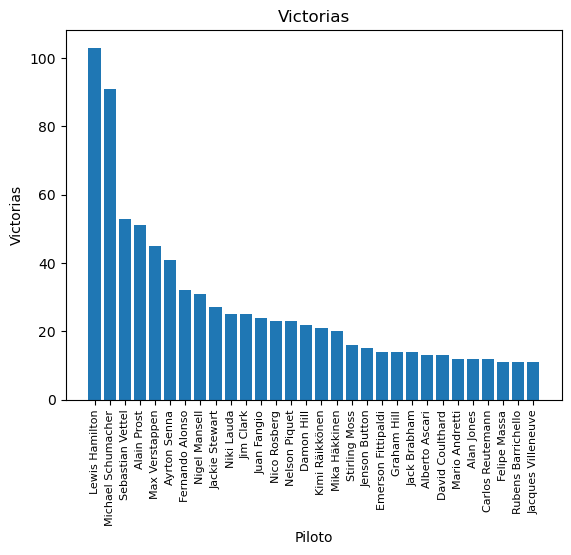

In [ ]:
#Creamos un gráfico de barras con los 30 pilotos que tienen más victorias
plt.bar(contador_victorias_piloto["nombre_completo"].head(30),contador_victorias_piloto["Total de Victorias"].head(30))
plt.title("Victorias")
#Modificamos algunos de los parámetros para adecuar el gráfico
plt.xticks(fontsize=8, rotation=90)
plt.xlabel("Piloto")
plt.ylabel("Victorias")

Observando el gráfico de barras con los 30 pilotos con mayor número de victorias podemos observar lo siguiente:
- **Lewis Hamilton** es el piloto con mayor número de victorias de la Fórmula 1 seguido muy de cerca por **Michael Schumacher**.
- Luego tenemos un grupo de pilotos que se encuentra entre el rango de 60 y 20 victorias que va de **Sebastian Vettel** a **Mika Hakkinen**.
- Finalmente tenemos a un grupo de pilotos que oscilan entra las 20 y 10 victorias conformado desde **Stirling Moss** a **Jacques Villeneuve**.

### Ratio de victorias por participaciones

Aprovechando el apartado anterior, profundizaremos en el análisis calculando el ratio de victorias de cada uno de los pilotos que hayan ganado una carrera

In [ ]:
#Obtenemos las participaciones de cada uno de los pilotos agrupandolos por su id
participaciones = results.groupby(by='driverId').size().reset_index(name="Participaciones")
#Obtenemos las victorias por piloto
participaciones = pd.merge(participaciones,contador_victorias_piloto,on="driverId")
#Calculamos el ratio de victoria
participaciones["ratio victoria participaciones"] =  participaciones["Total de Victorias"]  / participaciones["Participaciones"]
# Redondeamos el resultado
participaciones["ratio victoria participaciones"] = participaciones["ratio victoria participaciones"].round(2)
participaciones

,driverId,Participaciones,nombre_completo,Total de Victorias,ratio victoria participaciones
0,1,322,Lewis Hamilton,103,0.32
1,3,206,Nico Rosberg,23,0.11
2,4,370,Fernando Alonso,32,0.09
3,5,112,Heikki Kovalainen,1,0.01
4,8,352,Kimi Räikkönen,21,0.06
...,...,...,...,...,...
108,832,175,Carlos Sainz,1,0.01
109,839,123,Esteban Ocon,1,0.01
110,842,120,Pierre Gasly,1,0.01
111,844,115,Charles Leclerc,5,0.04


Text(0, 0.5, 'Ratio Victorias')

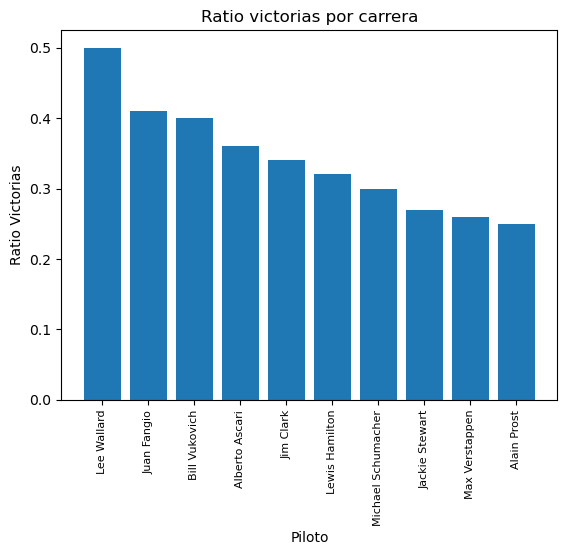

In [ ]:
#Ordenamos los valores de mayor a menor ratio
participaciones.sort_values(by="ratio victoria participaciones", ascending=False,inplace=True)
#Construimos el gráfico de barra con los 10 pilotos con mejor ratio.
plt.bar(participaciones["nombre_completo"].head(10),participaciones["ratio victoria participaciones"].head(10))
plt.title("Ratio victorias por carrera")
plt.xticks(fontsize=8, rotation=90)
plt.xlabel("Piloto")
plt.ylabel("Ratio Victorias")

Una vez obtenido el gráfico de barras con los 10 mejores pilotos en cuanto ratio de carrera por victoria podemos deducir lo siguiente:
- **Lee Wallard** dispone de un ratio tan alto ya que únicamente participo en 2 carreras, venciendo en una de ellas y en otra acabo con su vida.
- **Juan Fangio** al contrario que el ya mencionado Lee Wallard este participó en 52 carreras ganando el 24 de estas.
- **Bill Vukovich**  dispone del tercer mejor ratio pero al igual que el primero en la lista participo en 5 grandes premios ganando 2 de estos.
- **Jim Clark** participó en 72 grandes premios ganando 25.
- **Lewis Hamilton** tenemos al piloto con mayor número de victorias en la historia de la fórmula 1 en 5º lugar. Esta estadística puede seguir variando ya que el piloto todavía sigue en activo.
- **Michael Schumacher** segundo piloto con mayor número de victorias de la historia ya retirado.
- **Jackie Stewart** piloto británico que particpo en 99 grandes premios ganando 27 de estos.
- **Max Verstappen** actual campeón del mundo cuya estadística puede seguir variando conforme pasen los años.
- **Alain Prost** piloto francés tetracampeón del mundo que participó en 199 grandes premios, ganando 51 de estos.

### Evolución de vuelta rápida en el gran premio de Melbourne a lo largo de los años

En este aparatado analizaremos las vueltas más rápidas por edición en el gran premio de Melbourne.

In [ ]:
#Extraemos un dataset de races con las columnas establecidas entre comillas
tmp_races = races[['raceId', 'year', 'round', 'circuitId', 'name']].copy()
#Unimos el dataframe a partir del raceId
historic_races = pd.merge(tmp_races, lap_times, how="left", on="raceId" )

# Eliminamos aquellos datos que no representan un número
historic_races = historic_races[~historic_races['milliseconds'].isna()]

In [ ]:
historic_races

,raceId,year,round,circuitId,name,driverId,lap,position,time,milliseconds
0,1,2009,1,1,Australian Grand Prix,1.0,1.0,13.0,1:49.088,109088.0
1,1,2009,1,1,Australian Grand Prix,1.0,2.0,12.0,1:33.740,93740.0
2,1,2009,1,1,Australian Grand Prix,1.0,3.0,11.0,1:31.600,91600.0
3,1,2009,1,1,Australian Grand Prix,1.0,4.0,10.0,1:31.067,91067.0
4,1,2009,1,1,Australian Grand Prix,1.0,5.0,10.0,1:32.129,92129.0
...,...,...,...,...,...,...,...,...,...,...
552318,1110,2023,12,13,Belgian Grand Prix,817.0,40.0,17.0,1:54.361,114361.0
552319,1110,2023,12,13,Belgian Grand Prix,817.0,41.0,17.0,1:53.367,113367.0
552320,1110,2023,12,13,Belgian Grand Prix,817.0,42.0,16.0,1:55.247,115247.0
552321,1110,2023,12,13,Belgian Grand Prix,817.0,43.0,16.0,1:52.115,112115.0


In [ ]:
#Obtenmos la vuelta más rápida por año en el circutio
fastest_laps_per_year_circuit = historic_races.loc[historic_races.groupby(['year', 'circuitId'])['milliseconds'].idxmin()]
fastest_laps_per_year_circuit

,raceId,year,round,circuitId,name,driverId,lap,position,time,milliseconds
232083,224,1996,1,1,Australian Grand Prix,35.0,27.0,1.0,1:33.421,93421.0
237816,230,1996,7,4,Spanish Grand Prix,30.0,14.0,1.0,1:45.517,105517.0
237147,229,1996,6,6,Monaco Grand Prix,55.0,59.0,1.0,1:25.205,85205.0
238687,231,1996,8,7,Canadian Grand Prix,35.0,67.0,2.0,1:21.916,81916.0
239587,232,1996,9,8,French Grand Prix,35.0,48.0,2.0,1:18.610,78610.0
...,...,...,...,...,...,...,...,...,...,...
551639,1110,2023,12,13,Belgian Grand Prix,1.0,44.0,4.0,1:47.305,107305.0
548003,1107,2023,9,70,Austrian Grand Prix,830.0,71.0,1.0,1:07.012,67012.0
542152,1101,2023,4,73,Azerbaijan Grand Prix,847.0,51.0,8.0,1:43.370,103370.0
540372,1099,2023,2,77,Saudi Arabian Grand Prix,830.0,50.0,2.0,1:31.906,91906.0


In [ ]:
# Nos centramos en el gran premio de australia
australian_gp = fastest_laps_per_year_circuit[fastest_laps_per_year_circuit['circuitId'] == 1]
australian_gp

,raceId,year,round,circuitId,name,driverId,lap,position,time,milliseconds
232083,224,1996,1,1,Australian Grand Prix,35.0,27.0,1.0,1:33.421,93421.0
214725,207,1997,1,1,Australian Grand Prix,49.0,36.0,1.0,1:30.585,90585.0
198833,191,1998,1,1,Australian Grand Prix,57.0,39.0,2.0,1:31.649,91649.0
182745,175,1999,1,1,Australian Grand Prix,30.0,55.0,8.0,1:32.112,92112.0
164807,158,2000,1,1,Australian Grand Prix,22.0,41.0,2.0,1:31.481,91481.0
147356,141,2001,1,1,Australian Grand Prix,30.0,34.0,1.0,1:28.214,88214.0
130100,124,2002,1,1,Australian Grand Prix,8.0,37.0,2.0,1:28.541,88541.0
114198,108,2003,1,1,Australian Grand Prix,8.0,32.0,1.0,1:27.724,87724.0
95350,90,2004,1,1,Australian Grand Prix,30.0,29.0,1.0,1:24.125,84125.0
76351,71,2005,1,1,Australian Grand Prix,4.0,24.0,3.0,1:25.683,85683.0


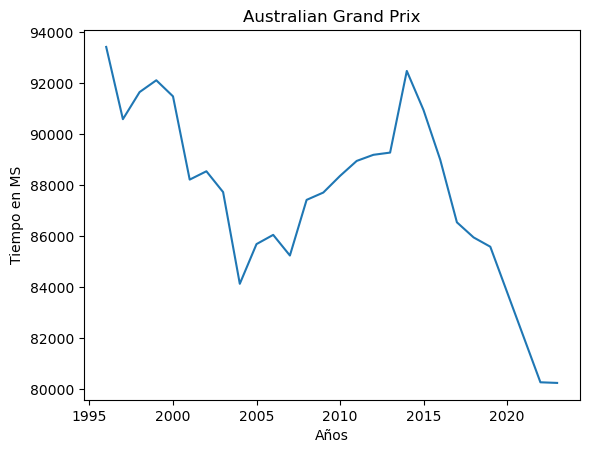

In [ ]:
# Construimos la gráfica
plt.plot(list(australian_gp['year']), list(australian_gp['milliseconds']))
# Configuramos las propiedades de la gráfica
plt.title(australian_gp['name'].iloc[0])
plt.xlabel("Años")
plt.ylabel("Tiempo en MS")
plt.show()

Observando la gráfica obtenida podemos deducir lo siguiente:
- En el año 2022 se obtuvo el mejor tiempo en el circutio de Australia, hay que tener en cuenta que desde ese año el circuito sufrió modificaciones que lo hicieron más rápido y como consecuencia el tiempo por vuelta disminuyó bastante.
- Antes de que el circutio sufriera modificaciones en el año 2022, el año en el que el circuito fue más rápido fue en el 2004. Los coches que participaron en la edición de ese año fueron los más rápidos de la década y los últimos vehículos de la categoría en montar motores v12, que cambió en el año 2005 a motores con menor cilindrada y por ello las vueltas rápidas fueron más lentas en años posteriores ya que los motores eran menos potentes y los coches también eran menos eficientes aerodinámicamente.

### Análisis de puntos constructores temporada 2010

En este apartado analizaremos la evolución de puntación de los equipos en la temporada de Fórmula 1 del año 2010.

In [ ]:
# Enlazamos la información de la clasificación de contructores con los resultados de grandes premios del dataset
constructor_race = pd.merge(constructor_standings, races, how="left", on="raceId")
# Renombramos columna que se duplica
constructor_race.rename(columns={"name": "circuit_name"},inplace=True)
# Enlazamos la información relacionada previamente con los constructores
constructor_race = pd.merge(constructor_race, constructors, on="constructorId")
# Filtramos las columnas que nos interesan
constructor_race = constructor_race[[
    'constructorStandingsId', 'raceId', 'constructorId', 'points',
    'position', 'wins', 'year', 'round', 'circuitId',
    'circuit_name', 'date', 'time', 'quali_date',
    'quali_time', 'sprint_time', 'constructorRef', 'name'
]]
constructor_race

,constructorStandingsId,raceId,constructorId,points,position,wins,year,round,circuitId,circuit_name,date,time,quali_date,quali_time,sprint_time,constructorRef,name
0,1,18,1,14.0,1,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,\N,\N,\N,mclaren,McLaren
1,7,19,1,24.0,1,1,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,\N,\N,\N,mclaren,McLaren
2,18,20,1,28.0,3,1,2008,3,3,Bahrain Grand Prix,2008-04-06,11:30:00,\N,\N,\N,mclaren,McLaren
3,29,21,1,34.0,3,1,2008,4,4,Spanish Grand Prix,2008-04-27,12:00:00,\N,\N,\N,mclaren,McLaren
4,40,22,1,42.0,3,1,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,\N,\N,\N,mclaren,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13046,28518,1106,214,44.0,5,0,2023,8,7,Canadian Grand Prix,2023-06-18,18:00:00,2023-06-17,20:00:00,\N,alpine,Alpine F1 Team
13047,28538,1107,214,47.0,5,0,2023,9,70,Austrian Grand Prix,2023-07-02,13:00:00,2023-06-30,15:00:00,14:30:00,alpine,Alpine F1 Team
13048,28548,1108,214,47.0,6,0,2023,10,9,British Grand Prix,2023-07-09,14:00:00,2023-07-08,14:00:00,\N,alpine,Alpine F1 Team
13049,28558,1109,214,47.0,6,0,2023,11,11,Hungarian Grand Prix,2023-07-23,13:00:00,2023-07-22,14:00:00,\N,alpine,Alpine F1 Team


In [ ]:
#Ordenamos las carreras por Id o lo que es lo mismo por orden de celbración
constructor_race.sort_values(by=['raceId'],inplace=True)
# Extraemos los datos correspondientes al año 2010
constructor_champ_2010 = constructor_race[constructor_race['year'] == 2010]
# Realizamos comprobación
constructor_champ_2010[constructor_champ_2010['name'] == "Ferrari"]

,constructorStandingsId,raceId,constructorId,points,position,wins,year,round,circuitId,circuit_name,date,time,quali_date,quali_time,sprint_time,constructorRef,name
3214,24232,337,6,43.0,1,1,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,\N,\N,\N,ferrari,Ferrari
3215,24244,338,6,70.0,1,1,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,\N,\N,\N,ferrari,Ferrari
3216,24256,339,6,76.0,1,1,2010,3,2,Malaysian Grand Prix,2010-04-04,08:00:00,\N,\N,\N,ferrari,Ferrari
3217,24268,340,6,90.0,2,1,2010,4,17,Chinese Grand Prix,2010-04-18,06:00:00,\N,\N,\N,ferrari,Ferrari
3218,24280,341,6,116.0,2,1,2010,5,4,Spanish Grand Prix,2010-05-09,12:00:00,\N,\N,\N,ferrari,Ferrari
3220,24304,342,6,136.0,2,1,2010,6,6,Monaco Grand Prix,2010-05-16,12:00:00,\N,\N,\N,ferrari,Ferrari
3219,24316,343,6,146.0,3,1,2010,7,5,Turkish Grand Prix,2010-05-30,11:00:00,\N,\N,\N,ferrari,Ferrari
3221,24328,344,6,161.0,3,1,2010,8,7,Canadian Grand Prix,2010-06-13,16:00:00,\N,\N,\N,ferrari,Ferrari
3222,24340,345,6,165.0,3,1,2010,9,12,European Grand Prix,2010-06-27,12:00:00,\N,\N,\N,ferrari,Ferrari
3223,24352,346,6,165.0,3,1,2010,10,9,British Grand Prix,2010-07-11,12:00:00,\N,\N,\N,ferrari,Ferrari


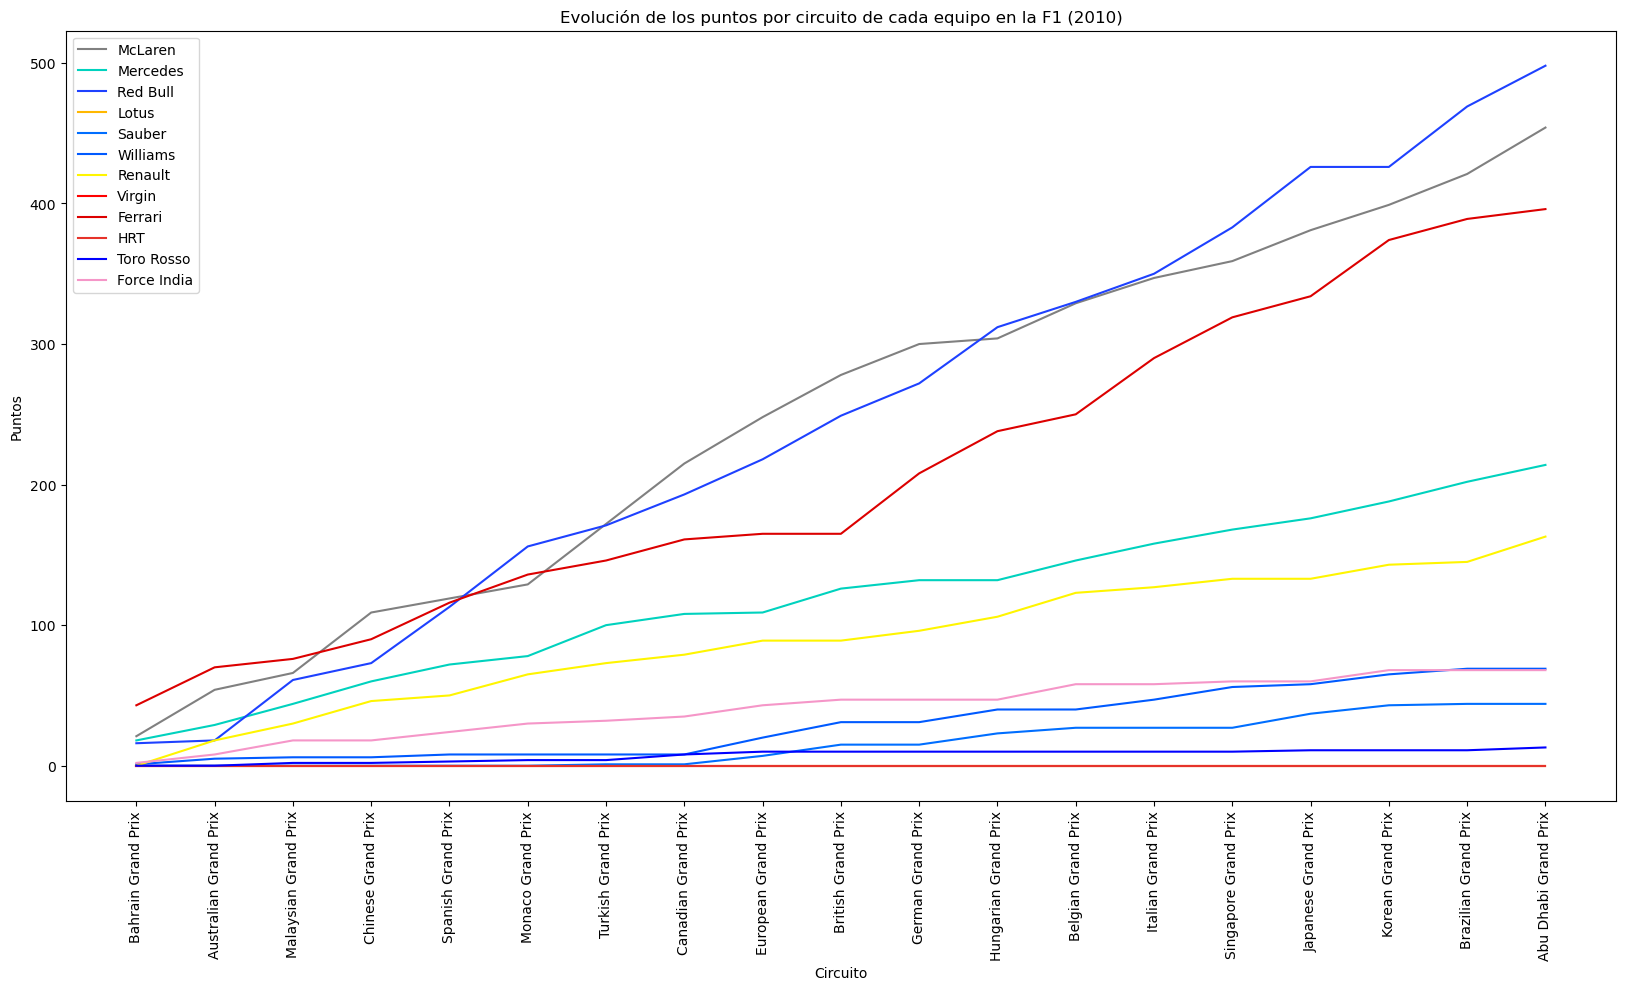

In [ ]:
# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots(figsize=(20,10))
team_color = {
    "McLaren": "grey",
    "Ferrari": "#DC0000",
    "Red Bull": "#1E41FF",
    "Mercedes": "#00D2BE",
    "Lotus": "#FFB800",
    "Force India": "#F596C8",
    "Williams": "#005AFF",
    "Renault": "#FFF500",
    "Toro Rosso": "#0000FF",
    "Sauber": "#006EFF",
    "HRT": "#E6332A",
    "Virgin": "#FF0000"
}


# Para cada equipo, graficar la evolución de los puntos por circuito
for equipo in constructor_champ_2010['name'].unique():
    equipo_datos = constructor_champ_2010[constructor_champ_2010['name'] == equipo]
    ax.plot(equipo_datos['circuit_name'], equipo_datos['points'], label=equipo, color=team_color[equipo])

# Añadir etiquetas y título
ax.set_xlabel('Circuito')
ax.set_ylabel('Puntos')
ax.set_title('Evolución de los puntos por circuito de cada equipo en la F1 (2010)')

# Añadir una leyenda
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()

Una vez generada la gráfica con la evolución del campeonato podemos observar 3 grupos:
- **Candidatos al título** : Mclaren, Ferrari y RedBull.
    - Podemos observar que ferrari comienza muy bien el campeonato pero se desinfla conforme pasan las carreras.
    - Mclaren tiene un inicio bastante regular llegando incluso a liderar el campeonato pero al final del campeonato se distancian del lider.
    - RedBull tiene un inicio irregular pero con el paso de las carreras consolidan su posición en liderato ganando el mundial con bastante ventaja sobre Mclaren.
- **Clase Media** : Mercedes, Renault. Se les considerá asi porque no están cerca de los 3 primeros ni de los demás equipos.
- **Clase Baja** : ForceIndia, Sauber, Williams, ToroRosso. Son los equipos que han sido capces de puntuar poco en contadas ocasiones
- **No puntuan**: HRT,Virgin, Lotus. Equipos que no han sido capaces de puntuar en toda la temporada.


In [ ]:
constructor_champ_2010_ordered = constructor_champ_2010.sort_values(by=['constructorId', 'raceId'])
constructor_champ_2010_ordered['Puntos por Circuito'] = constructor_champ_2010_ordered.groupby('constructorId')['points'].diff().fillna(constructor_champ_2010_ordered['points'])
constructor_champ_2010_ordered

,constructorStandingsId,raceId,constructorId,points,position,wins,year,round,circuitId,circuit_name,date,time,quali_date,quali_time,sprint_time,constructorRef,name,Puntos por Circuito
623,24233,337,1,21.0,2,0,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,\N,\N,\N,mclaren,McLaren,21.0
624,24245,338,1,54.0,2,1,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,\N,\N,\N,mclaren,McLaren,33.0
625,24257,339,1,66.0,2,1,2010,3,2,Malaysian Grand Prix,2010-04-04,08:00:00,\N,\N,\N,mclaren,McLaren,12.0
626,24269,340,1,109.0,1,2,2010,4,17,Chinese Grand Prix,2010-04-18,06:00:00,\N,\N,\N,mclaren,McLaren,43.0
627,24281,341,1,119.0,1,2,2010,5,4,Spanish Grand Prix,2010-05-09,12:00:00,\N,\N,\N,mclaren,McLaren,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12361,24444,351,205,0.0,10,0,2010,15,15,Singapore Grand Prix,2010-09-26,12:00:00,\N,\N,\N,lotus_racing,Lotus,0.0
12362,24456,352,205,0.0,10,0,2010,16,22,Japanese Grand Prix,2010-10-10,06:00:00,\N,\N,\N,lotus_racing,Lotus,0.0
12363,24480,353,205,0.0,10,0,2010,17,35,Korean Grand Prix,2010-10-24,05:00:00,\N,\N,\N,lotus_racing,Lotus,0.0
12364,24492,354,205,0.0,10,0,2010,18,18,Brazilian Grand Prix,2010-11-07,16:00:00,\N,\N,\N,lotus_racing,Lotus,0.0


A continuación analizaremos para el grupo de constructores candidatos al título  los puntos conseguidos por cada carrera del campeonato y intentaremos identificar las fortalezas y debilidades de cada uno de los equipos.

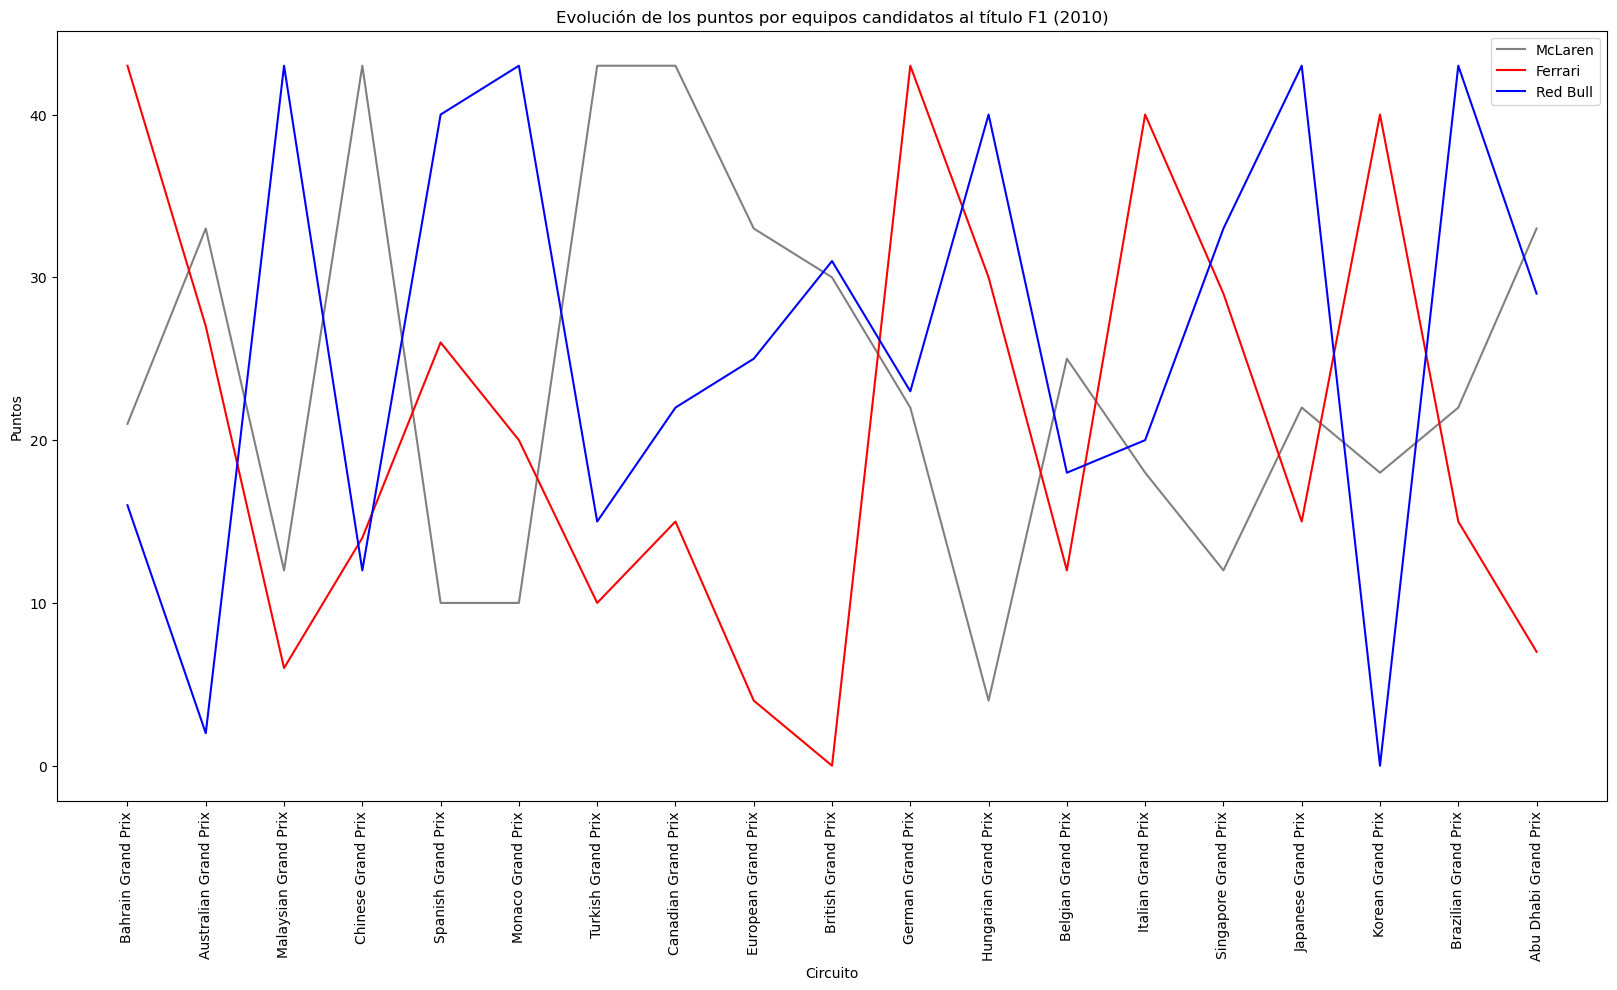

In [ ]:
# First group: Ferrari RedBull y McLaren

contenders_2010 = constructor_champ_2010_ordered[(constructor_champ_2010_ordered['name'] == 'Ferrari')|(constructor_champ_2010_ordered['name'] == 'McLaren')|(constructor_champ_2010_ordered['name'] == 'Red Bull')]
fig, ax = plt.subplots(figsize=(20,10))

team_color = {
    "Ferrari": "red",
    "McLaren": "grey",
    "Red Bull": "blue"
}
# Para cada equipo, graficar la evolución de los puntos por circuito
for equipo in contenders_2010['name'].unique():
    equipo_datos = contenders_2010[contenders_2010['name'] == equipo]
    ax.plot(equipo_datos['circuit_name'], equipo_datos['Puntos por Circuito'], label=equipo,color=team_color[equipo])

# Añadir etiquetas y título
ax.set_xlabel('Circuito')
ax.set_ylabel('Puntos')
ax.set_title('Evolución de los puntos por equipos candidatos al título F1 (2010)')

# Añadir una leyenda
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.show()

Las concluisiones que podemos extraer de esta gráfica es la siguiente.
- Las mejores puntuaciones de **Ferrari** han sido en circuitos con baja/media carga aerodinámica (`Bahrein Grand Prix `,`German Grand Prix`,`Italian Grand Prix`,`Korean Grand Prix`). En cambio, se observa en aquellos circutios con alta carga aerodinámica las puntuaciones son muy bajas.
- Las mejores puntuaciones de **McLaren** han sido bastante irregular, no se observa ningún patrón de puntuación en circuitos de características similares, pero podemos decir que aquellos circuitos en los que la puntuación ha sido mayor es en circutios de alta carga aerodinámica (`Turkish Grand Prix`,`Canadian Grand Prix`).
- Las mejores puntuaciones de **Red Bull** se ha producido en circutios de alta carga aerodinámica (`Malaysian Grand Prix`,`Spanish Grand Prix`,`Monaco Grand Prix`, `Hungarian Grand Prix`, `Japanese Grand Prix`,`Brazilian Grand Prix`). Pese a no ser su punto fuerte, los circutios de alta carga aerodinámica para este equipo no resultaba un problema grave ya que conseguían actuaciones sólidas obteniendo gran cantidad de puntos.

Por lo tanto, podemos determinar que una de las claves por las que RedBull ganó el mundial ha sido por la capacidad de adaptación a circuitos de distintas características. Dicha capacidad es la que les ha faltado a los demás equipos para ser capaces de competir en el mundial de constructores.

In [ ]:
results_per_race = pd.merge(results, races, on="raceId")
# Obtenemos los datos de 2010
results_per_race_2010 = results_per_race[results_per_race['year'] == 2010].copy()
results_per_race_2010.rename(columns={'name': 'Circuit Name'},inplace=True)

results_per_race_2010 = pd.merge(results_per_race_2010, drivers, on="driverId",how="left")
results_per_race_2010.rename(columns={'nationality': 'Driver nationality'},inplace=True)

results_per_race_2010 = pd.merge(results_per_race_2010, constructors, on="constructorId",how="left")
results_per_race_2010.rename(columns={'name': 'Team', 'nationality': 'Country'},inplace=True)


results_per_race_2010 = results_per_race_2010[['resultId', 'raceId', 'driverId', 'constructorId', 'grid', 'position','forename', 'surname', 'Team', 'Circuit Name']]
results_per_race_2010 = pd.merge(results_per_race_2010,driver_standings,on=["driverId","raceId"])
results_per_race_2010.rename(columns={"position_x":'posicion final', "position_y":'posicion campeonato'},inplace=True)
results_per_race_2010





,resultId,raceId,driverId,constructorId,grid,posicion final,forename,surname,Team,Circuit Name,driverStandingsId,points,posicion campeonato,positionText,wins
0,20323,337,4,6,3,1,Fernando,Alonso,Ferrari,Bahrain Grand Prix,63737,25.0,1,1,1
1,20324,337,13,6,2,2,Felipe,Massa,Ferrari,Bahrain Grand Prix,63738,18.0,2,2,0
2,20325,337,1,1,4,3,Lewis,Hamilton,McLaren,Bahrain Grand Prix,63739,15.0,3,3,0
3,20326,337,20,9,1,4,Sebastian,Vettel,Red Bull,Bahrain Grand Prix,63740,12.0,4,4,0
4,20327,337,3,131,5,5,Nico,Rosberg,Mercedes,Bahrain Grand Prix,63741,10.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,20774,355,32,164,24,20,Christian,Klien,HRT,Abu Dhabi Grand Prix,64317,0.0,27,27,0
452,20775,355,15,205,19,21,Jarno,Trulli,Lotus,Abu Dhabi Grand Prix,64307,0.0,21,21,0
453,20776,355,10,166,21,\N,Timo,Glock,Virgin,Abu Dhabi Grand Prix,64310,0.0,25,25,0
454,20777,355,30,131,8,\N,Michael,Schumacher,Mercedes,Abu Dhabi Grand Prix,64296,72.0,9,9,0


# Análisis comparativo de pilotos comparativa 2010

Para completar el análisis realizado previamente de los equipos candidatos a ganar el título de constructores, vamos a comparar y analizar el rendimiento de los pilotos de cada uno de los equipos para determinar si la pareja que componía a cada escudería era equilibrada o necesitaba de un cambio para poder obtener la mayor cantidad de puntos.

In [ ]:
# Equipos que quermos analizar
equipos =  [
    "Ferrari",
    "McLaren",
    "Red Bull"
]

lista_dfs = []
#iteramos equipos
for equipo in equipos:
    #Obtemnemos la información del equipo
    drivers_team = results_per_race_2010[results_per_race_2010['Team']==equipo]
    if(len(drivers_team['driverId'].unique())>2):
        continue
    #Obtenemos los id de los pilotos que componenen el equipo
    driver1, driver2 = drivers_team['driverId'].unique()
    #Ordenamos los resultados en función del id de la carrera
    driver1_stats = drivers_team[drivers_team['driverId']== driver1].sort_values(by="raceId")
    #Remplazamos posición final a 999 cuando no se ha finalizado la carrera
    driver1_stats['posicion final'].replace('\\N', 999, inplace=True)
    #Convertimos el resultado a entero
    driver1_stats["posicion final"] = driver1_stats["posicion final"].astype(int)
    #Convetimos la posición de salida en carrera a entero
    driver1_stats["grid"] = driver1_stats["grid"].astype(int)
    #Obtenemos las victorias del piloto1
    driver1_wins = len(driver1_stats[driver1_stats["posicion final"] == 1])
    #Obtemos los podiums del piloto1
    driver1_podiums = len(driver1_stats[driver1_stats["posicion final"]<= 3])

    #Ordenamos los resultados en función del id de la carrera
    driver2_stats = drivers_team[drivers_team['driverId']== driver2].sort_values(by="raceId")
    #Remplazamos posición final a 999 cuando no se ha finalizado la carrera
    driver2_stats['posicion final'].replace('\\N', 999, inplace=True)
    #Convertimos la posición final a entero
    driver2_stats["posicion final"] = driver2_stats["posicion final"].astype(int)
    #Convertimos la posición de salida a entero
    driver2_stats["grid"] = driver2_stats["grid"].astype(int)
    #Obtenemos las victorias del piloto2
    driver2_wins = len(driver2_stats[driver2_stats["posicion final"] == 1])
    #Obtenmos los podiums del piloto2
    driver2_podiums = len(driver2_stats[driver2_stats["posicion final"]<= 3])

    stats = pd.DataFrame(data=[],columns=["Driver", "Points","Race","Qualifyng","Best Grid Position","Best Finish Position","Wins","Podiums", 'team'])
    #Variables que se utilizan para contabilizar el piloto1 vs piloto2
    driver1_race = 0
    driver1_qualifying = 0

    driver2_race = 0
    driver2_qualifying = 0

    #Obtenemos el mejor resultado en carrera para el piloto1 y piloto2
    driver1_best_race = driver1_stats["posicion final"].min()
    driver2_best_race = driver2_stats["posicion final"].min()
    #Obtenemos el mejor resultado en clasificación para el piloto 1 y piloto 2
    driver1_best_grid = driver1_stats["grid"].min()
    driver2_best_grid = driver2_stats["grid"].min()
    #Realizamos la comparativa entre el piloto 1 y piloto2 para calcular las veces en las que ha quedado mejor cada uno en carrera y clasificación
    for race_id in drivers_team['raceId'].unique():
        if int(driver1_stats[driver1_stats["raceId"]== race_id].iloc[0]["posicion final"]) < int(driver2_stats[driver2_stats["raceId"]== race_id].iloc[0]["posicion final"]):
            driver1_race = driver1_race + 1
        else:
            driver2_race = driver2_race + 1

        if int(driver1_stats[driver1_stats["raceId"]== race_id].iloc[0]["grid"]) < int(driver2_stats[driver2_stats["raceId"]== race_id].iloc[0]["grid"]):
            driver1_qualifying = driver1_qualifying + 1
        else:
            driver2_qualifying = driver2_qualifying + 1
    #DataFrame utilizado para obtener el gráfico comparativa entre los pilotos de la escuderia
    filas = pd.DataFrame({
        "Driver":[driver1_stats["surname"].iloc[0], driver2_stats["surname"].iloc[0]],
        "Points": [driver1_stats['points'].max(), driver2_stats['points'].max()],
        "Race":[driver1_race,driver2_race],
        "Qualifyng":[driver1_qualifying, driver2_qualifying],
        "Best Grid Position":[driver1_best_grid, driver2_best_grid],
        "Best Finish Position":[driver1_best_race, driver2_best_race],
        "Wins":[driver1_wins, driver2_wins],
        "Podiums":[driver1_podiums, driver2_podiums],
        "team": [driver1_stats['Team'].iloc[0], driver2_stats['Team'].iloc[0]]
    })


    stats = pd.concat([stats, filas], ignore_index=True)

    lista_dfs.append(stats.copy())


stats

,Driver,Points,Race,Qualifyng,Best Grid Position,Best Finish Position,Wins,Podiums,team
0,Vettel,256.0,11,13,1,1,5,10,Red Bull
1,Webber,242.0,8,6,1,1,4,10,Red Bull


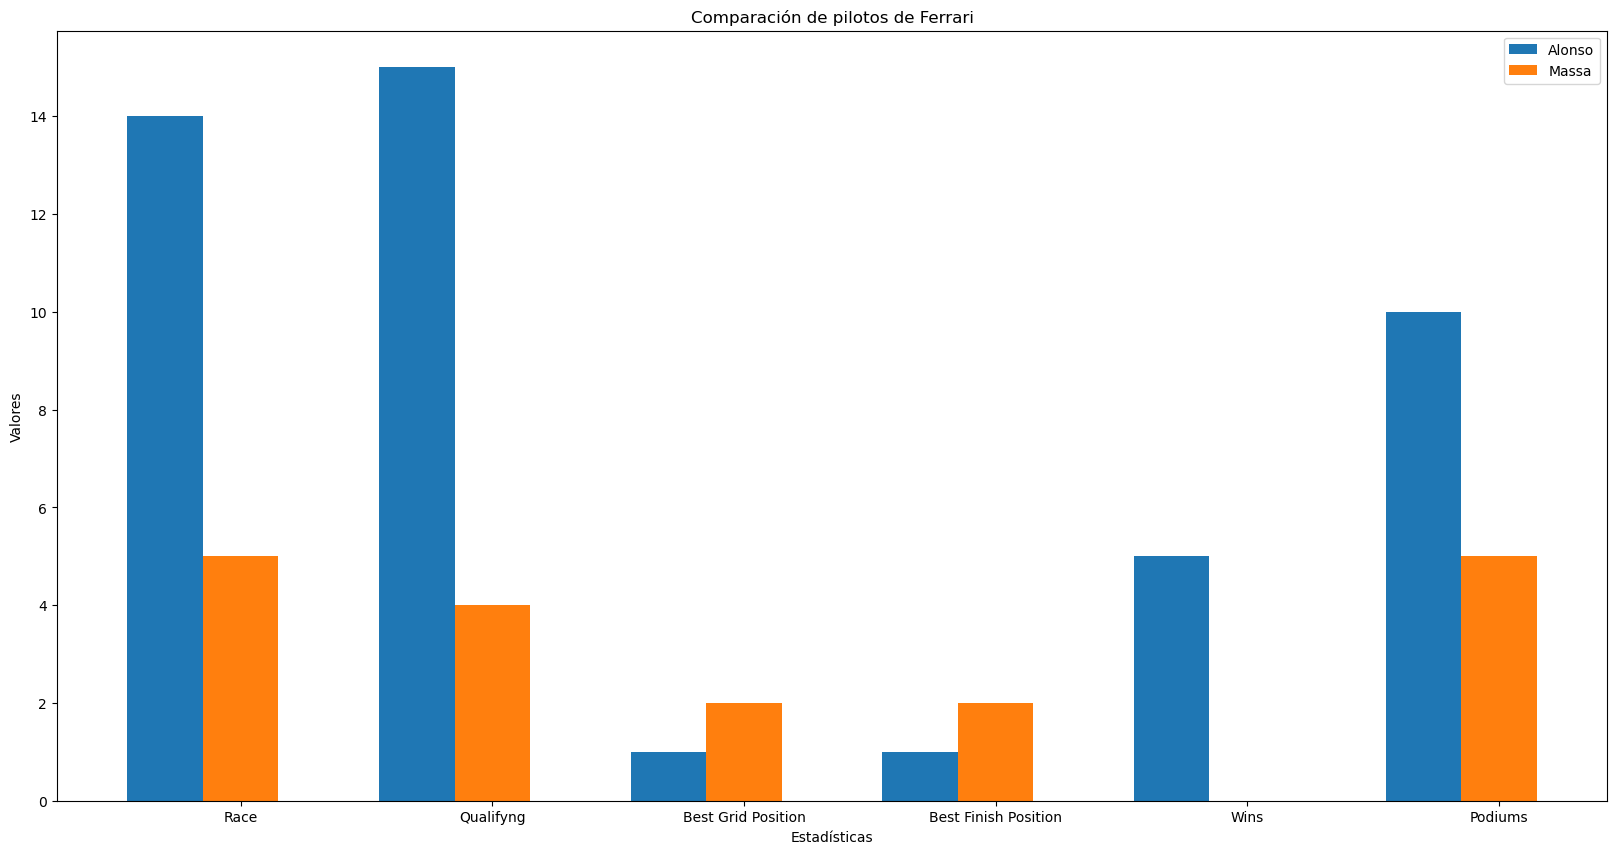

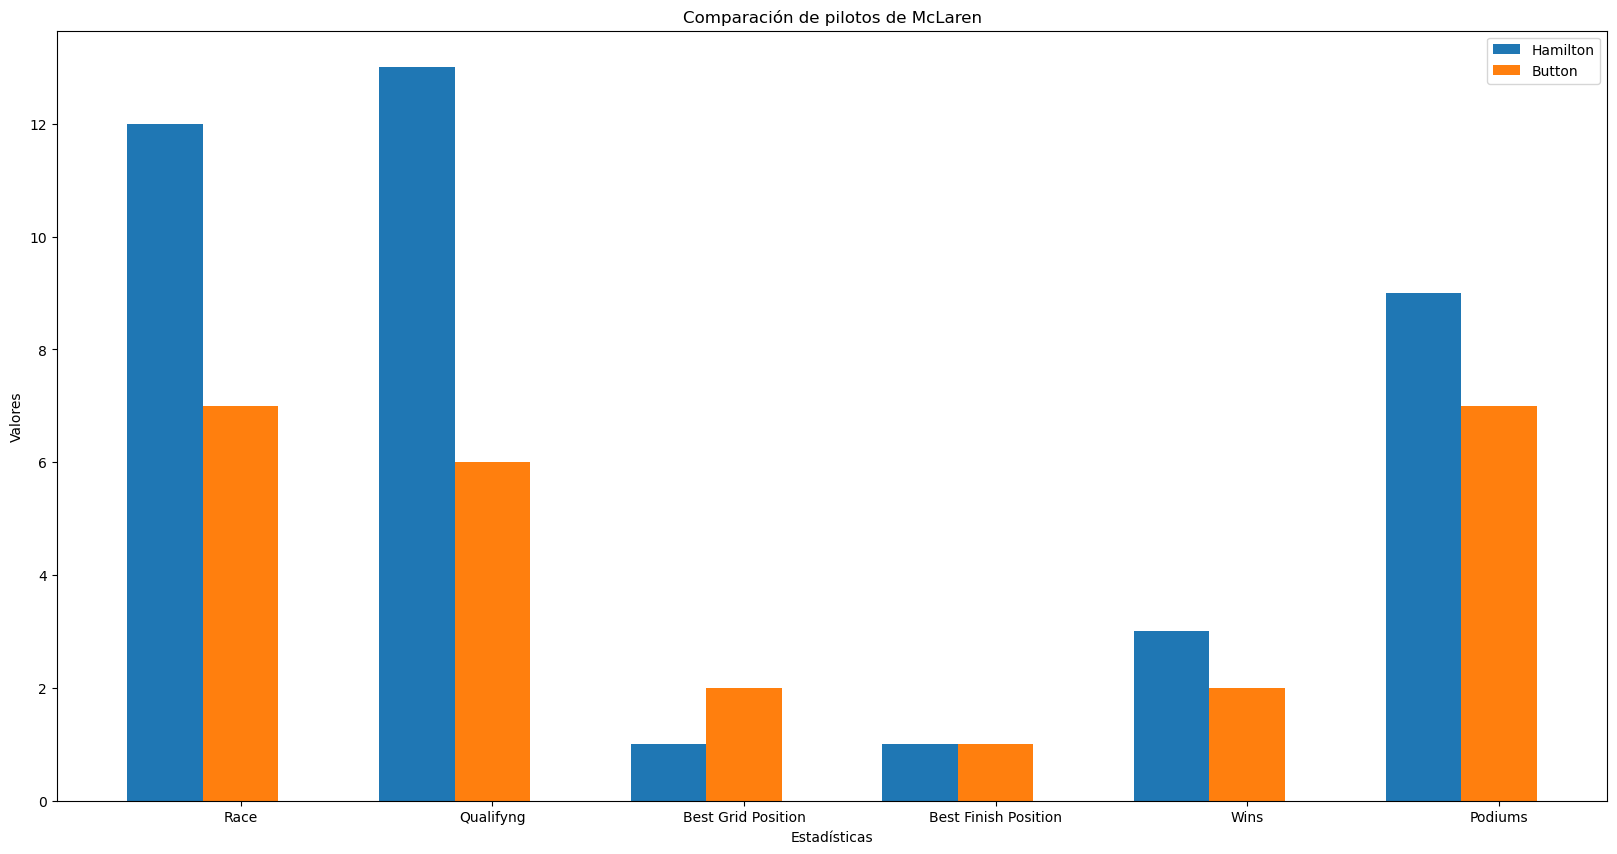

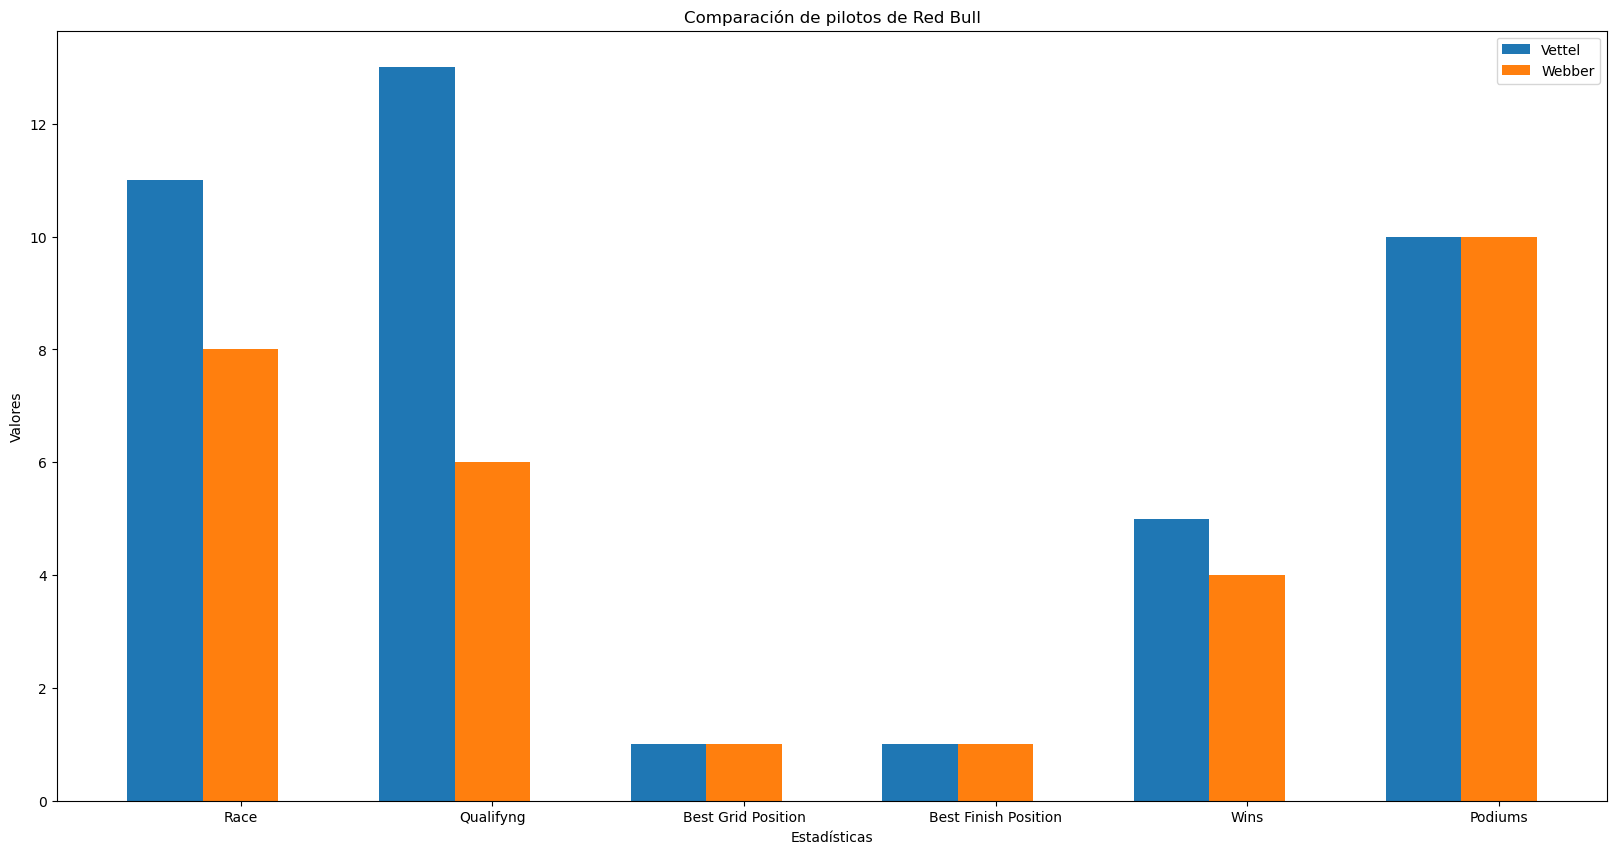

In [ ]:

for df in lista_dfs:

    plt.figure(figsize=(20, 10))

    # Definir la posición de las barras en el eje X
    x = np.arange(len(df.columns) - 3)

    # Crear un gráfico de barras para cada piloto
    for i, driver in df.iterrows():
        plt.bar(x + i*0.3, driver[2:-1], width=0.3, label=driver['Driver'])

    # Etiquetar el eje X con las estadísticas
    plt.xticks(x + 0.3, df.columns[2:-1])

    # Añadir etiquetas y título
    plt.xlabel('Estadísticas')
    plt.ylabel('Valores')
    plt.title(f'Comparación de pilotos de {df["team"].iloc[0]}')

    # Añadir una leyenda
    plt.legend()

    # Mostrar el gráfico
    plt.show()

De los gráficos de barras de comparativa entre los pilotos de la mismo escudería podemos sacar las siguientes conclusiones:
- La escudería con más desigualdad entre pilotos es la de **Ferrari** ya que Alonso supera a Massa en carrera y clasificación en más de 10 ocasiones. Siendo Alonso el único capaz de conseguir una victoria.
- La pareja de la escudería de McLaren presenta menor desigualdad siendo Hamilton el mejor piloto de la escudería en esa temporada, pero a diferencia de Ferrari ambos pilotos fueron capaces de ganar carreras.
- Finalmente tenemos a la pareja de pilotos del equipo RedBull que es la más equilibrada de los tres equipos analizados ya que ambos pilotos han sido capaces de ganar múltiples carreras y conseguir la misma cantidad de podiums, siendo Vettel un poco mejor que Webber en clasificación y en carrera.

Para cerrar el análisis a continuación se obtendrá el porcentaje de puntos de la escudería obtenido por cada piloto.

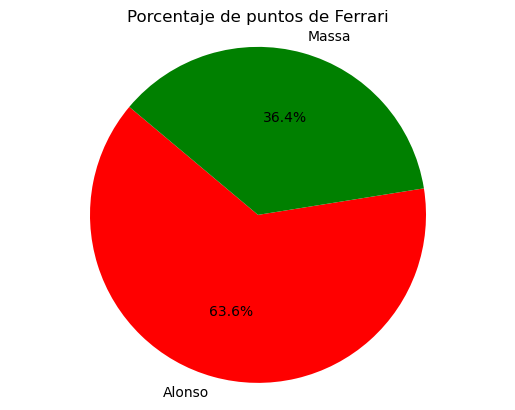

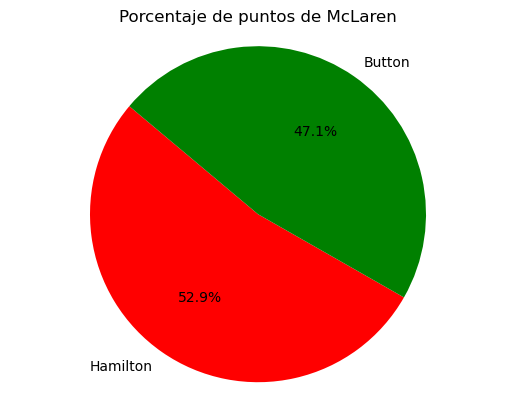

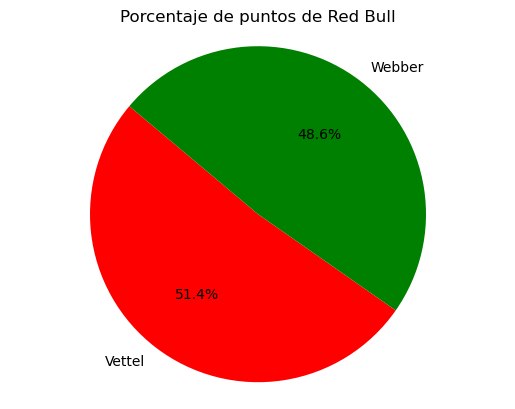

In [ ]:

for df in lista_dfs:

    etiquetas = list(df['Driver'])
    porc = df['Points'].iloc[0]/df['Points'].sum()
    sizes = [porc*100, (1-porc)*100]
    colores = ['red','green']

    # Excluir la primera y última categoría




    # Crear el diagrama de sectores
    plt.pie(sizes, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)

    # Configuración adicional (opcional)
    plt.axis('equal')
    plt.title(f'Porcentaje de puntos de {df["team"].iloc[0]}')

    # Mostrar el gráfico
    plt.show()

Siguiendo el análisis previo podemos ver que los gráficos generados apoyan las conclusiones previamente y nos permite determinar lo siguiente.
- Las parejas de pilotos de Mclaren y Red Bull no necesitan un cambio de pilotos ya que el reparto de puntos es casi equitativo.
- La pareja de pilotos de Ferrari necesita una revisión ya que Alonso obtuvo casi un 30 % más de puntos que Massa en la temporada, por lo tanto si formaramos parte de la directiva de la escudería Ferrari se tomaría la decisión de remplazar a Massa por otro piloto que pueda proporcionar un rendimiento similar al de Alonso.

# Conclusiones

Como hemos podido observar durante la realización de este trabajo hemos sido capaces de:

- Entender y analizar las distintas formas a la hora de cargar datos.
- Preparar y transformar los datos para enlazar aquellos datos que nos interesan analizar.
- Generar diferentes tipos de gráficos para facilitar la fase de análisis.

En cambio, no hemos sido capaces de aplicar un modelo predictivo ya que disponemos de un conjunto de datos asociados a sucesos objetivos que no podemos utilizar para realizar una predicción.